In [ ]:
!pip install scipy==1.6.0
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

#device = "cuda"
device = "cpu"
load_weight = True
save_dir        = "./"
weight_float32  = "mnist_model.pt"


     |████████████████████████████████| 27.4 MB 23 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# int8: -128~127
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
#transform = transforms.Compose([transforms.ToTensor(),])

In [ ]:
trainset = datasets.MNIST('./trainset', download=True, train=True, transform=transform)
#trainset = datasets.MNIST('./trainset', download=True, train=True)

valset = datasets.MNIST('./testset', download=True, train=False, transform=transform)
#valset = datasets.MNIST('./testset', download=True, train=False)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./trainset/MNIST/raw/train-images-idx3-ubyte.gz to ./trainset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./trainset/MNIST/raw/train-labels-idx1-ubyte.gz to ./trainset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./trainset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./trainset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./trainset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./trainset/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./testset/MNIST/raw/train-images-idx3-ubyte.gz to ./testset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./testset/MNIST/raw/train-labels-idx1-ubyte.gz to ./testset/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./testset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./testset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./testset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./testset/MNIST/raw



In [ ]:
print(trainset)
dataiter = iter(trainloader)
images, labels = dataiter.next()
#images = transforms.functional.convert_image_dtype(images, torch.int8)
#print(type(dataiter))
#for p in dataiter:
#    print(p)

print(images.shape)
print(labels.shape)
#print(images[0].numpy())


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./trainset
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
torch.Size([64, 1, 28, 28])
torch.Size([64])


array([[[-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ,
         -1.        , 

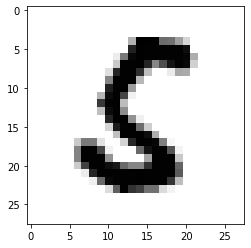

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');
images[0].numpy()

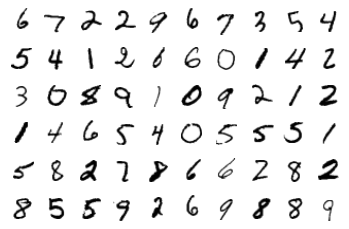

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
import os
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
"""
model = nn.Sequential(torch.quantization.QuantStub(),
                      nn.Linear(input_size, hidden_sizes[0]),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.Linear(hidden_sizes[1], output_size),
                      torch.quantization.DeQuantStub(),
                      nn.LogSoftmax(dim=1))
"""

class M(torch.nn.Module):
    def __init__(self):
        super(M, self).__init__()
        self.FC1     = torch.nn.Linear(input_size, hidden_sizes[0], bias=False)
        self.FC2     = torch.nn.Linear(hidden_sizes[0], hidden_sizes[1], bias=False)
        self.FC3     = torch.nn.Linear(hidden_sizes[1], output_size, bias=False)
        self.lgs     = torch.nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = self.FC1(x)
        x = self.FC2(x)
        x = self.FC3(x)
        return self.lgs(x)

model = M()
model.train()
model.to(device)


M(
  (FC1): Linear(in_features=784, out_features=128, bias=False)
  (FC2): Linear(in_features=128, out_features=64, bias=False)
  (FC3): Linear(in_features=64, out_features=10, bias=False)
  (lgs): LogSoftmax(dim=1)
)

In [ ]:
criterion = nn.NLLLoss().to(device)
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1).to(device)
labels = labels.to(device)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [ ]:
#print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
#print('After backward pass: \n', model[0].weight.grad)

In [ ]:
if not load_weight:
    #optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
    optimizer = optim.Adam(model.parameters(), lr=0.003)
    time0 = time()
    epochs = 5
    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1).to(device)
            labels = labels.to(device)
            
            # Training pass
            optimizer.zero_grad()
            
            output = model(images)
            loss = criterion(output, labels)
            
            #This is where the model learns by backpropagating
            loss.backward()
            
            #And optimizes its weights here
            optimizer.step()
            
            running_loss += loss.item()
        else:
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
    print("\nTraining Time (in minutes) =",(time()-time0)/60)
    torch.save(model.state_dict(), os.path.join(weight_float32))
else:
    model.load_state_dict(torch.load(os.path.join(save_dir, weight_float32)))

RuntimeError: ignored

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784).to(device)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.to("cpu").numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
print(type(img.view(1, 28, 28)))
plt.imshow(img.view(1, 28, 28).to("cpu").numpy().squeeze(), cmap='gray_r');

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784).to(device)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.to("cpu").numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

#Float Range Check

In [ ]:
min_val = float('inf')
max_val = -float('inf')
e_arr = np.ndarray(shape=(1,))

def range_check(x):
    global min_val, max_val
    if (min_val > x.min()):
        min_val = x.min()
    if (max_val < x.max()):
        max_val = x.max()

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784).to(device)
    with torch.no_grad():
        #logps = model(img)
        x = model.FC1(img)
        e_arr = np.concatenate([e_arr, x.numpy().flatten()], axis=0)
        x = model.FC2(x)
        e_arr = np.concatenate([e_arr, x.numpy().flatten()], axis=0)
        x = model.FC3(x)
        e_arr = np.concatenate([e_arr, x.numpy().flatten()], axis=0)
        logps = model.lgs(x)


    ps = torch.exp(logps)
    probab = list(ps.to("cpu").numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))
#print(f"\nMin:{min_val}, Max:{max_val}")
#np.histogram(e_arr)

In [ ]:
print(f"Min:{e_arr.min()}, Max:{e_arr.max()}")
plt.hist(np.clip(e_arr, -4, 3))

#Q-Number

In [ ]:
# Q-Format = Q1.6 (8-b: sign for 1b, int for 1b, point for 6b)
from scipy.special import log_softmax
import json
import codecs

nbits = 8
s = 1
m = 2
n = 5

def tohex(val: int, nbits: int) -> str:
    if (val < 0):
        return format((val + (1 << nbits)) % (1 << nbits), f'0{int(nbits/4)}x')
    else:
        return format(val, f'0{int(nbits/4)}x')

def hexto(hexval: str, nbits: int) -> str:
    ret = int(hexval, 16)
    if ((2 ** (nbits - 1)) <= ret):
        ret = ret - (1 << nbits)
    return ret

class QModel:
    def __init__(self, model=None, s=0, m=0, n=0):
        if (model != None):
            self.s = s  # sign bit(1b)
            self.m = m  # integer bit
            self.n = n  # decimal bit
            self.nbits = s+m+n
            self.min_val = hexto(tohex(-2**(self.nbits-1), self.nbits), self.nbits)
            self.max_val = hexto(tohex(2**(self.nbits-1)-1, self.nbits), self.nbits)
            self.FC1 = self.float_to_fixed(model.FC1.weight.detach().numpy())
            self.FC2 = self.float_to_fixed(model.FC2.weight.detach().numpy())
            self.FC3 = self.float_to_fixed(model.FC3.weight.detach().numpy())
            self.K = 2**(self.n-1)
        else:
            pass
    
    def info(self):
        print("---- Model Info ----")
        print(f"Min value:{self.min_val}")
        print(f"Max value:{self.max_val}")
        print(f"FC1[{self.FC1.shape}]: {self.FC1}")
        print(f"FC2[{self.FC2.shape}]: {self.FC2}")
        print(f"FC3[{self.FC3.shape}]: {self.FC3}")

    def float_to_fixed(self, x):
        ret = np.trunc(x*(2**self.n)).astype(int)
        ret = np.clip(ret, self.min_val, self.max_val)
        #print(ret)
        return ret
    
    def fixed_to_float(self, x):
        ret = x/(2**self.n)
        return ret

    def matmul(self, a, b) -> np.ndarray:
        ret = np.clip(np.matmul(a, b.transpose()), -1024, 1023)
        ret = np.trunc((ret + self.K)/(2**self.n)).astype(int)
        ret = np.clip(ret, self.min_val, self.max_val)
        return ret

    def forward(self, x: np.ndarray) -> np.ndarray:
        x = self.float_to_fixed(x)
        x = self.matmul(x, self.FC1)
        x = self.matmul(x, self.FC2)
        x = self.matmul(x, self.FC3)
        x = self.fixed_to_float(x)
        x = log_softmax(x)
        return x
    
    def load(self, json_file:str):
        tmp = None
        with open(os.path.join(json_file)) as fp:
            tmp = json.loads(fp.read())
        self.s = tmp['s']
        self.m = tmp['m']
        self.n = tmp['n']
        self.nbits = s+m+n
        self.min_val = hexto(tohex(-2**(self.nbits-1), self.nbits), self.nbits)
        self.max_val = hexto(tohex(2**(self.nbits-1)-1, self.nbits), self.nbits)
        self.K = 2**(self.n-1)
        self.FC1 = np.array(tmp['weight']['FC1'])
        self.FC2 = np.array(tmp['weight']['FC2'])
        self.FC3 = np.array(tmp['weight']['FC3'])
    
    def save(self, json_file:str):
        ret = {
                's' : self.s,
                'm' : self.m,
                'n' : self.n,
                'weight': {
                    'FC1' : self.FC1.tolist(),
                    'FC2' : self.FC2.tolist(),
                    'FC3' : self.FC3.tolist()
                }
            }
        json.dump(ret, codecs.open(json_file, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4)


In [ ]:
#qm = QModel(model, s, m, n)
qm = QModel()
qm.load("./qm.json")

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784).to(device)
    with torch.no_grad():
        logps = qm.forward(img.numpy())


    ps = torch.exp(torch.tensor(logps))
    probab = list(ps.to("cpu").numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))
#print(f"\nMin:{min_val}, Max:{max_val}")
#np.histogram(e_arr)

In [ ]:
img = np.load("./img0.npy")
plt.imshow(img.reshape(28, 28), 'gray_r')
#logps = qm.forward(img)

#x = self.float_to_fixed()
x = qm.matmul(img, qm.FC1)
np.save("./FC1_GOLDEN_VECTOR.npy", x)
x = qm.matmul(x, qm.FC2)
np.save("./FC2_GOLDEN_VECTOR.npy", x)
x = qm.matmul(x, qm.FC3)
np.save("./FC3_GOLDEN_VECTOR.npy", x)
x = qm.fixed_to_float(x)
x = log_softmax(x)

ps = torch.exp(torch.tensor(x))
probab = list(ps.to("cpu").numpy()[0])
pred_label = probab.index(max(probab))

print(f"pred:{pred_label}")

In [ ]:
qm.info()
qm.save('qm.json')


In [ ]:
np.save("./img0_q4.3.npy", qm.float_to_fixed(images[0].view(1, 784).numpy()))
np.save("./img0_float.npy", (images[0].view(1, 784).numpy()))

In [ ]:
print(images[0])

In [ ]:
plt.imshow(qm.float_to_fixed(images[2].view(1, 784).numpy()).reshape((28, 28)), 'gray_r')

In [ ]:
plt.imshow((images[2].view(1, 784).numpy()).reshape((28, 28)), 'gray_r')